In [1]:
%load_ext autoreload
import os
workDir = os.getcwd()
user = 'testID' #CERN user ID
institution = 'UCSB' #UCSB
print(workDir)

/Users/Matthew/Documents/SchoolWork/physics/GradNotes/ParticlePhysics/PostdocResearch/HGC/EstToolsSUSY/FiducialsQC


In [2]:
%run utils/GetExcel.ipynb

#The sensor file can contain the fiducials of the sensor, but can also have the 
#component heights for sensor in location P1 or P2.
#Methods can run either way! 

pcbfile = workDir + '/data/some-PCB-file.xls'
fiducialfile = workDir + '/data/GantryTrayFiducialData.xls'
sensorfile = workDir + '/data/P2_and_P2_XYZ_Feb_10.xls'
surveyfile = workDir + '/data/V3_02 unconstrained shape 3.1.22 flatness.xls'
#surveyfile = workDir + '/data/V3_01 unconstrained shape 3.1.22 flatness redo.xls'

survey = GetExcel(surveyfile)
survey.read()
#print(survey.df)

sensor = GetExcel(sensorfile)
sensor.read()
#print(sensor.df.tail())

fiducial = GetExcel(fiducialfile)
fiducial.read()
#print(fiducial.df.head())

pcb = GetExcel(pcbfile)
pcb.read()
#print(pcb.df.head())

FILEPATHS MAY BE WRONG!! CANNOT FIND /Users/Matthew/Documents/SchoolWork/physics/GradNotes/ParticlePhysics/PostdocResearch/HGC/EstToolsSUSY/FiducialsQC/data/some-PCB-file.xls


In [3]:
%run utils/ReadDataframe.ipynb
%autoreload 2

if sensor.exists:
    senDF = ReadDataframe(sensor.df, sensorfile)
    senDF.readComponentFiducials()
    senDF.readComponentHeights()

if fiducial.exists:
    fidDF = ReadDataframe(fiducial.df, fiducialfile)
    fidDF.readTrayFiducials()

if pcb.exists:
    pcbDF = ReadDataframe(pcb.df, pcbfile)
    pcbDF.readComponentFiducials()
    pcbDF.readComponentHeights()
    
if survey.exists:
    surveyDF = ReadDataframe(survey.df, surveyfile)
    surveyDF.readComponentHeights()

Unnamed: 3 Unnamed: 2 Unnamed: 5
[1.761, 1.835, 1.735, 1.643, 1.57, 1.487, 1.463, 1.472, 1.457, 1.483, 1.575, 1.615, 1.638, 1.652, 1.611, 1.603, 1.664, 1.709, 1.784, 1.678, 1.629, 1.682, 1.719, 1.757, 1.73] [55.004, 54.952, 54.901, 64.155, 96.041, 127.133, 146.422, 172.432, 209.633, 218.953, 219.129, 219.367, 210.374, 173.5, 146.809, 127.642, 94.647, 65.004, 92.101, 116.911, 160.714, 176.154, 156.076, 115.23, 138.269] [223.387, 260.399, 296.076, 313.089, 331.498, 349.892, 349.753, 335.029, 313.752, 298.688, 267.092, 224.91, 208.28, 186.944, 171.221, 171.647, 190.561, 207.401, 267.059, 302.015, 298.519, 262.437, 226.304, 230.396, 265.348]
Unnamed: 3 Unnamed: 2 Unnamed: 5
[1.169, 1.223, 1.254, 1.261, 1.295, 1.288, 1.281, 1.29, 1.266, 1.265, 1.329, 1.371, 1.388, 1.506, 1.48, 1.469, 1.382, 1.181, 1.35, 1.354, 1.362, 1.395, 1.482, 1.435, 1.419] [44.464, -0.035, -44.209, -48.337, -69.277, -91.447, -92.896, -70.53, -48.505, -43.394, 0.867, 43.98, 49.316, 71.388, 93.003, 93.515, 71.863, 49.326

In [4]:
%run utils/QualityControl.ipynb
%autoreload 2

if sensor.exists:
    sensorP1 = QualityControl(fidDF, senDF, 'P1', False)
    if len(senDF.pointsP1): sensorP1.runTransform()
    if len(senDF.heightP1): sensorP1.runHeights()
    sensorP1.rating()
    print(sensorP1)

    sensorP2 = QualityControl(fidDF, senDF, 'P2', False)
    if len(senDF.pointsP2): sensorP2.runTransform()
    if len(senDF.heightP2): sensorP2.runHeights()
    sensorP2.rating()
    print(sensorP2)
    
if pcb.exists:
    pcbP1 = QualityControl(fidDF, pcbDF, 'P1', True)
    if len(pcbDF.pointsP1): pcbP1.runTransform()
    if len(pcbDF.heightP1): pcbP1.runHeights()
    pcbP1.rating()
    print(pcbP1)

    pcbP2 = QualityControl(fidDF, pcbDF, 'P2', True)
    if len(pcbDF.pointsP2): pcbP2.runTransform()
    if len(pcbDF.heightP2): pcbP2.runHeights()
    pcbP2.rating()
    print(pcbP2)
    
if survey.exists:
    surveyComp = QualityControl(fidDF, surveyDF, 'Survey', False, True)
    if len(surveyDF.heightP1): surveyComp.runHeights()

The module/component in P1 has completed QC!
Rotation --> Left Fiducial: 90.627 degrees, Right Fiducial: 90.627 degrees
The angle of the sensor in position P1 is YELLOW. 
Placement --> (x,y) = (0.114, 0.058) mm
The placement of the sensor in position P1 is RED. 
Height --> 1.638 - (0.181) + (0.197) mm
The mean heights of the module in position P1 are GREEN. 
The minimum difference in height of the module in position P1 is RED. 
The maximum difference in height of the module in position P1 is RED. 

The FINAL rating of the module in position P1 is RED.

The module/component in P2 has completed QC!
Rotation --> Left Fiducial: nan degrees, Right Fiducial: 89.731 degrees
The angle of the sensor in position P2 is GREEN. 
Placement --> (x,y) = (nan, nan) mm
Height --> 1.582 - (0.270) + (0.287) mm
The mean heights of the module in position P2 are GREEN. 
The minimum difference in height of the module in position P2 is RED. 
The maximum difference in height of the module in position P2 is RED.

In [5]:
%run utils/CreateXML.ipynb
%autoreload 2

if sensor.exists:
    if sensorP1.finalRating != 'NO INFO':
        sensorP1XML = CreateXML(sensorP1, user, institution)
        sensorP1XML.save(senDF.dir, senDF.name + '_P1.xml')

    if sensorP2.finalRating != 'NO INFO':
        sensorP2XML = CreateXML(sensorP2, user, institution)
        sensorP2XML.save(senDF.dir, senDF.name + '_P2.xml')
    
if pcb.exists:
    if pcbP1.finalRating != 'NO INFO':
        pcbP1XML = CreateXML(pcbP1, user, institution)
        pcbP1XML.save(pcbDF.dir, pcbDF.name + '_P1.xml')
    
    if pcbP2.finalRating != 'NO INFO':
        pcbP2XML = CreateXML(pcbP2, user, institution)
        pcbP2XML.save(pcbDF.dir, pcbDF.name + '_P2.xml')

Saving UPLOAD XML file to  /Users/Matthew/Documents/SchoolWork/physics/GradNotes/ParticlePhysics/PostdocResearch/HGC/EstToolsSUSY/FiducialsQC/data/P2_and_P2_XYZ_Feb_10_P1_upload.xml
Saving UPLOAD XML file to  /Users/Matthew/Documents/SchoolWork/physics/GradNotes/ParticlePhysics/PostdocResearch/HGC/EstToolsSUSY/FiducialsQC/data/P2_and_P2_XYZ_Feb_10_P2_upload.xml


Plotting hexmaps
Plotting hexmaps
Plotting hexmaps


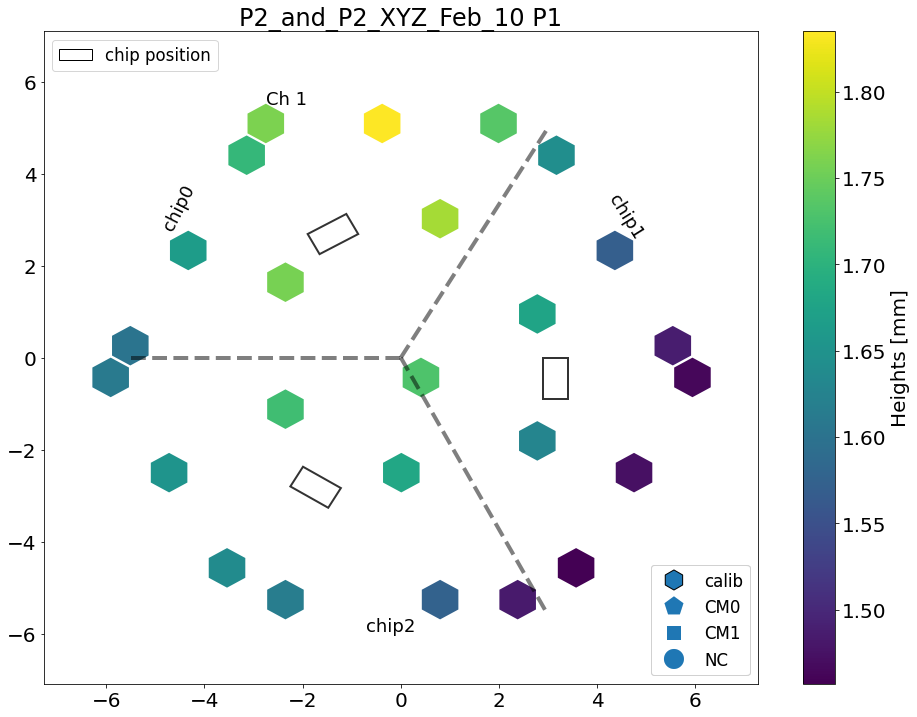

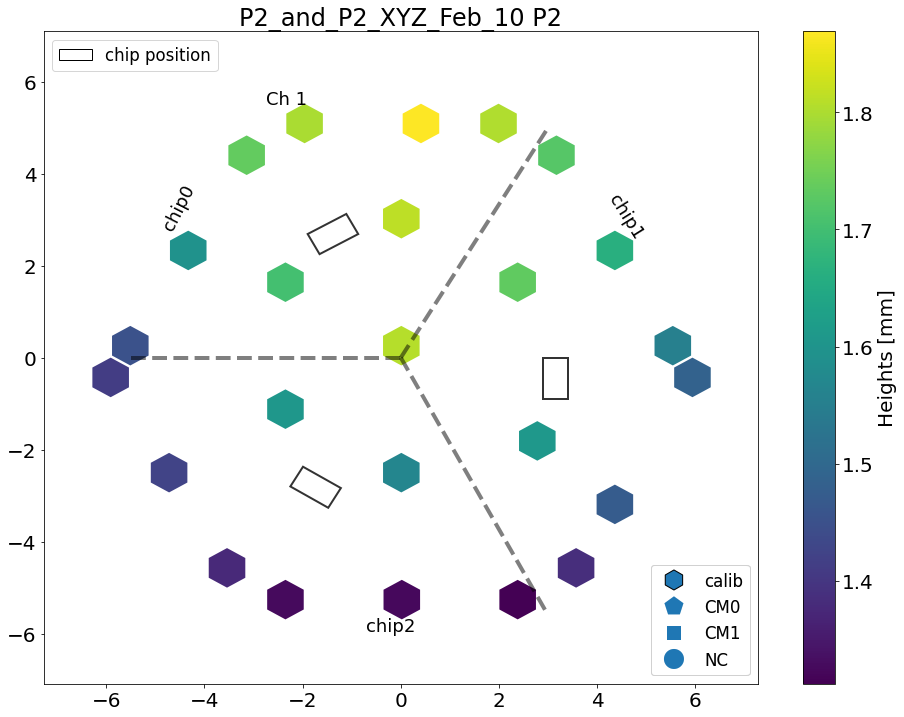

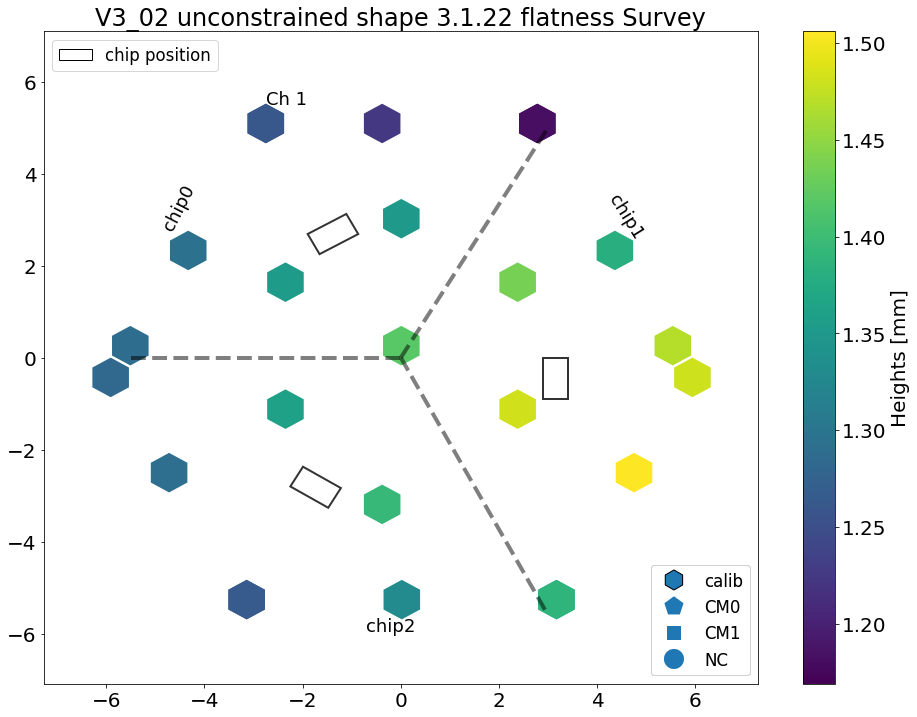

In [6]:
%run utils/HeightPlotter.ipynb
%autoreload 2

if sensor.exists:
    if len(sensorP1.hgts):
        label = senDF.name + ' P1'
        senPlotP1 = HeightPlotter(sensorP1.hgts, sensorP1.hXY, senDF.name + '_P1', senDF.dir + '/', label)
        senPlotP1.padMapping()
    
    if len(sensorP2.hgts):
        label = senDF.name + ' P2'
        senPlotP2 = HeightPlotter(sensorP2.hgts, sensorP2.hXY, senDF.name + '_P2', senDF.dir + '/', label)
        senPlotP2.padMapping()

if pcb.exists:
    if len(pcbP1.hgts):
        label = pcbDF.name + ' P1'
        pcbPlotP1 = HeightPlotter(pcbP1.hgts, pcbP1.hXY, pcbDF.name + '_P1', pcbDF.dir + '/', label)
        pcbPlotP1.padMapping()
        
    if len(pcbP2.hgts):
        label = pcbDF.name + ' P2'
        pcbPlotP2 = HeightPlotter(pcbP2.hgts, pcbP2.hXY, pcbDF.name + '_P2', pcbDF.dir + '/', label)
        pcbPlotP2.padMapping()
        
if survey.exists:
    if len(surveyComp.hgts):
        label = surveyDF.name + ' Survey'
        surveyPlot = HeightPlotter(surveyComp.hgts, surveyComp.hXY, surveyDF.name + '_survey', surveyDF.dir + '/', label)
        surveyPlot.padMapping()